# Imports

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

plt.ion() # Turn on interactive mode on plots

# PyTorch imports
import torch

# Starting the environment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name="C:/Users/chris/git/deep-reinforcement-learning/p3_collab-compet/Tennis_Windows_x86_64/Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


# Environment Setup

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents
num_agents = len(env_info.agents)
#print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
#print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
#print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
#print('The state for the first agent looks like:', states[0])

## Implementation imports

In [4]:
# Auto load changes in the imported files
%load_ext autoreload
%autoreload 2

In [31]:
from ddpg.src.agent import DDPG_Agent, MADDPG_Agent
from ddpg.src.ddpg import ddpg_show, ddpg_train

### Define a DDPG-agent

In [39]:
actor_hidden_layers = [50, 50]
critic_hidden_layers = [50, 50]
agent1 = DDPG_Agent(state_size, action_size, num_agents, 0, actor_hidden_layers, critic_hidden_layers, use_batch_norm=True)

### Train the DDPG-agent

In [40]:
#(agent, env, brain_name, num_agents, actor_model_name, critic_model_name, target_reward, min_noise_coef = 0.05, n_episodes=3000, max_steps=1000, multi_agent=False):
scores1 = ddpg_train(agent1, env, brain_name, num_agents, actor_model_name='actor_model_1', critic_model_name='critic_model_1', target_reward=0.5, n_episodes=1500)

Episode 10	Average Score: 0.00	Average last 100 episodes: 0.00
Episode 20	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 30	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 40	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 50	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 60	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 70	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 80	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 90	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 100	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 110	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 120	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 130	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 140	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 150	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 160	Average S

Episode 1280	Average Score: 0.06	Average last 100 episodes: 0.05
Episode 1290	Average Score: 0.08	Average last 100 episodes: 0.06
Episode 1300	Average Score: 0.10	Average last 100 episodes: 0.06
Episode 1310	Average Score: 0.08	Average last 100 episodes: 0.06
Episode 1320	Average Score: 0.09	Average last 100 episodes: 0.07
Episode 1330	Average Score: 0.15	Average last 100 episodes: 0.09
Episode 1340	Average Score: 0.30	Average last 100 episodes: 0.12
Episode 1350	Average Score: 0.41	Average last 100 episodes: 0.16
Episode 1360	Average Score: 0.39	Average last 100 episodes: 0.19
Episode 1370	Average Score: 0.68	Average last 100 episodes: 0.28
Episode 1380	Average Score: 1.42	Average last 100 episodes: 0.46

Environment solved in 1282 episodes!	Average Score: 0.51
Episode 1390	Average Score: 2.24	Average last 100 episodes: 0.71
Episode 1400	Average Score: 2.63	Average last 100 episodes: 0.96
Episode 1410	Average Score: 2.50	Average last 100 episodes: 1.19
Episode 1420	Average Score: 2.13

In [41]:
last_100_scores = deque(maxlen=100)
mean_100_scores = []
for score in scores1:
    last_100_scores.append(score)
    mean_100_scores.append(np.mean(last_100_scores))

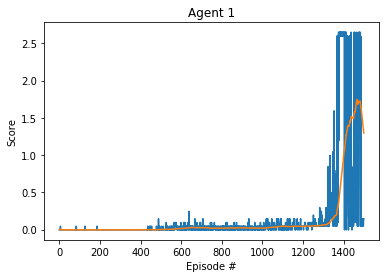

In [42]:
# plot the scores from the training
Scores_plot1 = plt.figure()
ax = Scores_plot1.add_subplot(111)
plt.plot(np.arange(len(scores1)), scores1)
plt.plot(np.arange(len(scores1)), mean_100_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Agent 1')

#plt.savefig("images/Scores_plot_agent2_maddpg.png")
plt.savefig("images/Scores_plot_agent1_ddpg.png")
plt.show()

In [43]:
with open('ddpg/results/scores1.txt', 'w') as f:
    for item in scores1:
        f.write("%s\n" % item)

### Define an MADDPG-agent

In [20]:
actor_hidden_layers = [50, 50]
critic_hidden_layers = [50, 50]
agent2 = MADDPG_Agent(state_size, action_size, num_agents, 0, actor_hidden_layers, critic_hidden_layers, use_batch_norm=True)

### Train the MADDPG-agent

In [21]:
scores2 = ddpg_train(agent2, env, brain_name, num_agents, actor_model_name='actor_model_ma2', critic_model_name='critic_model_ma2', target_reward=0.5, multi_agent=True)

Episode 10	Average Score: 0.00	Average last 100 episodes: 0.00
Episode 20	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 30	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 40	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 50	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 60	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 70	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 80	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 90	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 100	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 110	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 120	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 130	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 140	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 150	Average Score: -0.00	Average last 100 episodes: -0.00
Episode 160	Average S

Episode 1280	Average Score: 0.01	Average last 100 episodes: 0.02
Episode 1290	Average Score: 0.02	Average last 100 episodes: 0.02
Episode 1300	Average Score: 0.02	Average last 100 episodes: 0.02
Episode 1310	Average Score: 0.01	Average last 100 episodes: 0.02
Episode 1320	Average Score: 0.02	Average last 100 episodes: 0.02
Episode 1330	Average Score: 0.02	Average last 100 episodes: 0.01
Episode 1340	Average Score: 0.03	Average last 100 episodes: 0.02
Episode 1350	Average Score: 0.03	Average last 100 episodes: 0.02
Episode 1360	Average Score: 0.02	Average last 100 episodes: 0.02
Episode 1370	Average Score: 0.03	Average last 100 episodes: 0.02
Episode 1380	Average Score: 0.04	Average last 100 episodes: 0.02
Episode 1390	Average Score: 0.02	Average last 100 episodes: 0.02
Episode 1400	Average Score: 0.02	Average last 100 episodes: 0.02
Episode 1410	Average Score: 0.03	Average last 100 episodes: 0.03
Episode 1420	Average Score: 0.03	Average last 100 episodes: 0.03
Episode 1430	Average Scor

Episode 2550	Average Score: 0.32	Average last 100 episodes: 0.27
Episode 2560	Average Score: 0.12	Average last 100 episodes: 0.26
Episode 2570	Average Score: 0.12	Average last 100 episodes: 0.26
Episode 2580	Average Score: 0.18	Average last 100 episodes: 0.27
Episode 2590	Average Score: 0.26	Average last 100 episodes: 0.29
Episode 2600	Average Score: 0.35	Average last 100 episodes: 0.30
Episode 2610	Average Score: 0.82	Average last 100 episodes: 0.39
Episode 2620	Average Score: 1.45	Average last 100 episodes: 0.50

Environment solved in 2520 episodes!	Average Score: 0.50
Episode 2630	Average Score: 1.52	Average last 100 episodes: 0.61
Episode 2640	Average Score: 1.06	Average last 100 episodes: 0.63
Episode 2650	Average Score: 0.98	Average last 100 episodes: 0.74
Episode 2660	Average Score: 1.24	Average last 100 episodes: 0.86
Episode 2670	Average Score: 1.33	Average last 100 episodes: 0.98
Episode 2680	Average Score: 1.14	Average last 100 episodes: 1.05
Episode 2690	Average Score: 1.00

In [22]:
last_100_scores = deque(maxlen=100)
mean_100_scores = []
for score in scores2:
    last_100_scores.append(score)
    mean_100_scores.append(np.mean(last_100_scores))

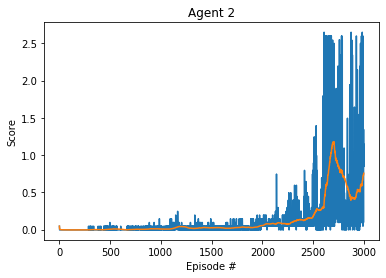

In [25]:
# plot the scores from the training
Scores_plot2 = plt.figure()
ax = Scores_plot2.add_subplot(111)
plt.plot(np.arange(len(scores2)), scores2)
plt.plot(np.arange(len(scores2)), mean_100_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Agent 2')

plt.savefig("images/Scores_plot_agent2_maddpg.png")
plt.show()

In [26]:
with open('ddpg/results/scores2.txt', 'w') as f:
    for item in scores2:
        f.write("%s\n" % item)

## Initialising agent from saved weights and evaluating performance
Run the cell block below to load the pre-trained weights into the model.

### DDPG Agent

In [32]:
actor_hidden_layers = [50, 50]
critic_hidden_layers = [50, 50]
agent_show1 = DDPG_Agent(state_size, action_size, num_agents, 0, actor_hidden_layers, critic_hidden_layers, use_batch_norm=True)
ddpg_show(agent_show1, env, brain_name, num_agents, actor_model_names='ddpg/results/actor_model_1_end_train.pth')

Mean Score (for all agents): 0.3950000060722232
Score for individual agents:
[0.40000001 0.39000001]


### MADDPG Agent

In [28]:

actor_hidden_layers = [50, 50]
critic_hidden_layers = [50, 50]
agent_show2 = MADDPG_Agent(state_size, action_size, num_agents, 0, actor_hidden_layers, critic_hidden_layers, use_batch_norm=True)
ddpg_show(agent_show2, env, brain_name, num_agents, actor_model_names=['ddpg/results/actor_model_ma2_agent_0_end_train.pth', 'ddpg/results/actor_model_ma2_agent_1_end_train.pth'], multi_agent=True)

Mean Score (for all agents): 1.095000016503036
Score for individual agents:
[1.09000002 1.10000002]
